**Core Purpose of the Code:**

The provided code snippet focuses on demonstrating and comparing two interpolation methods for 1-dimensional spatial data:

1.  **Inverse Distance Weighting (IDW) with squared distances:** A classic and simple interpolation technique where the influence of each data point decreases with the square of its distance from the point being estimated.
2.  **Thin Plate Spline Radial Basis Function (TPS RBF):** A more sophisticated interpolation method using radial basis functions, specifically the thin plate spline kernel, known for its smoothness and ability to capture complex patterns.

**How the Code Contributes to the Presentation/Paper:**

1.  **Visual Comparison of Methods:**

-   The code generates a plot that visually compares the interpolation results of IDW and TPS RBF against the original "true" sine wave from which the sparse data was sampled.
-   This visual comparison serves to highlight the differences in smoothness, accuracy, and potential overfitting/underfitting tendencies between the two methods.

2.  **Illustrating "Beyond Traditional Methods" Theme:**

-   By including TPS RBF, the code showcases a more advanced interpolation technique compared to the traditional IDW method.
-   This aligns with the "Beyond Traditional Methods" theme, suggesting the exploration of newer and potentially more powerful approaches for spatial data analysis in the context of the coal geology.

3.  **Potential Applications for coal geology:**

-   While the code uses a simple sine wave example, the underlying interpolation methods (IDW and RBF) are applicable to real-world geological and geophysical data encountered in the Sydney Basin.
-   The presentation/paper extends these concepts to demonstrate how these techniques could be used for tasks like:
    -   Interpolating subsurface geological layers or structures from sparse borehole data
    -   Interpolating coal quality results from sparse borehole data
    -   Predicting geophysical properties (e.g., gravity, magnetic) across the basin
    -   Modeling groundwater flow or contaminant transport

**Key Points Highlighted by the Code:**

-   **Trade-offs in Interpolation:** No single interpolation method is universally best. The code showcases the trade-off between simplicity (IDW) and potentially greater accuracy/smoothness (TPS RBF)
-   **Importance of Data Density:** The accuracy of any interpolation method depends on the density and distribution of the input data.
-   **Choice of Kernel Function:** For RBFs, the choice of kernel function can significantly impact the interpolation results.

**Overall, this code snippet serves as a foundational example in the presentation/paper to illustrate the concept of moving beyond traditional interpolation methods and exploring the potential of more advanced techniques like RBFs for spatial data analysis within the context of coal modelling.**

As always, your comments and pull requests are welcome.

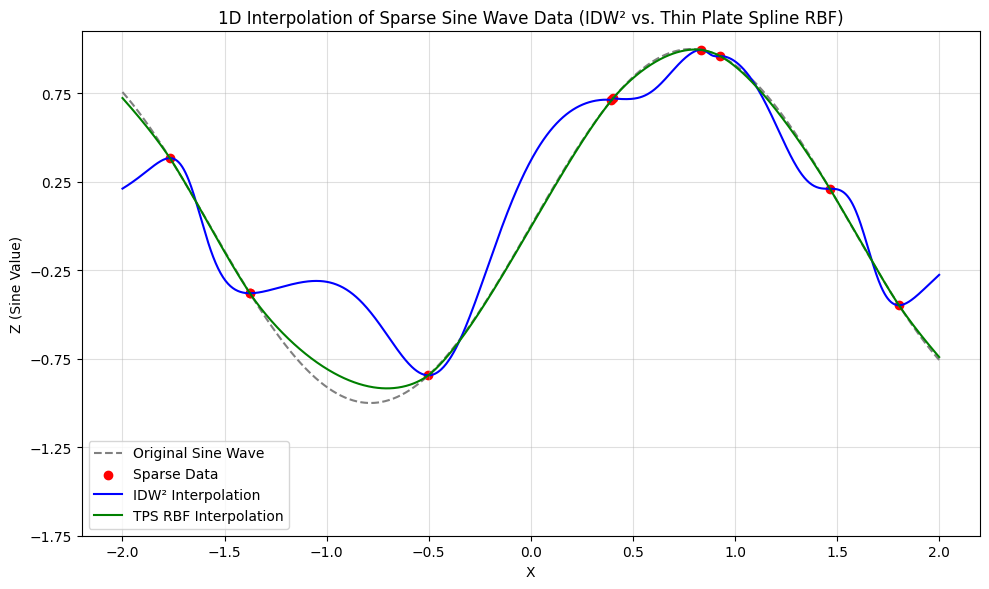

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator
from scipy.spatial import distance_matrix

# 1. Generate Data
np.random.seed(42)
x = np.random.rand(10) * 4 - 2
z = np.sin(2*x)
x_grid = np.linspace(-2, 2, 1000)

# 2. Interpolation
# IDW function (squared distance)
def simple_idw_squared(x, z, xi):
    dist = distance_matrix(x[:, np.newaxis], xi[:, np.newaxis]) 
    weights = 1.0 / (dist ** 2)
    weights /= weights.sum(axis=0)
    zi = np.dot(weights.T, z)
    return zi

z_idw = simple_idw_squared(x, z, x_grid)

# RBF Thin Plate Spline
rbf = RBFInterpolator(x[:, np.newaxis], z, kernel='thin_plate_spline') 
z_rbf = rbf(x_grid[:, np.newaxis])

# 3. Plot
plt.figure(figsize=(10, 6))
plt.plot(x_grid, np.sin(2*x_grid), color='gray', linestyle='dashed', label='Original Sine Wave')
plt.scatter(x, z, color='red', marker='o', label='Sparse Data')
plt.plot(x_grid, z_idw, color='blue', label='IDW² Interpolation')
plt.plot(x_grid, z_rbf, color='green', label='TPS RBF Interpolation')
plt.xlabel('X')
plt.ylabel('Z (Sine Value)')
plt.title('1D Interpolation of Sparse Sine Wave Data (IDW² vs. Thin Plate Spline RBF)')
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.legend(loc='lower left')
plt.grid(alpha=0.4)
plt.yticks(np.arange(-1.75, 1.2, 0.5))

plt.tight_layout()

plt.show()


**3D Terrain Modeling & Interpolation: Comparing IDW and RBF**

This code demonstrates the creation of a 3D terrain model and the comparison of two interpolation techniques for filling in the gaps between sparse data points:

-   **Inverse Distance Weighting (IDW)**: A classic method where estimated values are influenced more by nearby data points.
-   **Radial Basis Function (RBF) Interpolation**: A more flexible approach using radial basis functions to create smooth surfaces.

**Terrain Generation**

1.  **Create Base Terrain:**

    -   A gently sloping hill plane is generated using a simple linear equation, biased towards the back of the area.
2.  **Carve Creeks:**

    -   Two meandering creeks are carved into the hill plane, creating depressions in the terrain.
    -   The creek paths are generated with a slight bias to ensure they generally flow downwards, following the slope of the hill.
3.  **Scattered Data Points:**

    -   A set of 50 scattered data points is generated within the terrain area.
    -   These points represent locations where we have actual elevation measurements.
4.  **Interpolation of Scattered Data:**

    -   A temporary RBF interpolator is used to estimate elevation values (`z`) at the scattered data point locations.
    -   This ensures consistency in comparing IDW and RBF interpolation results later.

**Interpolation Methods**

1.  **IDW Interpolation:**

    -   The `simple_idw_squared_3d` function implements IDW using squared distances.
    -   It calculates the weighted average of nearby data points to estimate elevation at each grid point.
2.  **Linear RBF Interpolation:**

    -   The `RBFInterpolator` is used with a 'linear' kernel to create a smooth surface that passes through all the scattered data points.

**Visualization**

-   The code generates a 3D plot comparing the original terrain, the scattered data points, and the surfaces generated by IDW and RBF interpolation.
-   Lighting is added to enhance the 3D perception of the terrain.
-   The plot allows for visual assessment of how well each interpolation method captures the terrain features, especially the creeks and the overall slope.

**Key Takeaways**

-   **IDW vs. RBF:** Both methods can generate plausible terrain surfaces from scattered data.
-   **IDW:** Tends to create sharper transitions near data points.
-   **RBF:** Generally produces smoother surfaces, but the choice of kernel function can influence the results.
-   **Real-World Applications:** These interpolation techniques are widely used in geoscience to create continuous models from sparse sampling, aiding in understanding subsurface structures and properties.

**Additional Notes:**

-   The 'terrain' colormap is used to visualize the elevation data, mimicking natural terrain colors.
-   The Z-axis (elevation) can be slightly exaggerated to enhance the visual perception of the terrain features.
-   This code provides a basic demonstration. In real-world scenarios, more complex geological models and interpolation techniques might be employed.

As always, your comments and pull requests are welcome.

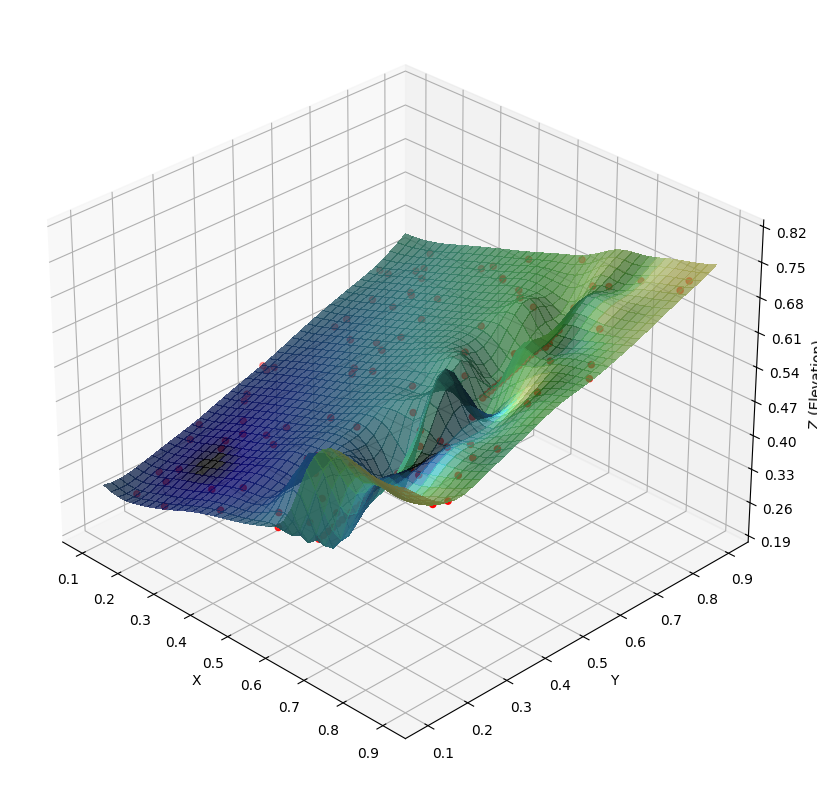

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from matplotlib.colors import LightSource
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# 1. Generate Scattered Data
np.random.seed(42)  # For reproducibility

# Range for Scattered Points (80% of surface extent)
x_range = (0.1, 0.9)  
y_range = (0.1, 0.9) 

# Hill Plane (Gently Sloping, biased towards the back)
x_hill = np.random.rand(100) * (x_range[1] - x_range[0]) + x_range[0]
y_hill = np.random.rand(100) * (y_range[1] - y_range[0]) + y_range[0]
z_hill = 0.5 * x_hill + 0.3 * y_hill + 0.2 * (1 - x_hill)  

# Creeks (Carved Depressions - with bias for perpendicularity)
num_creeks = 2
x_creek, y_creek, z_creek = [], [], []
for _ in range(num_creeks):
    creek_length = 20

    # Choose starting points within the restricted range
    x_start = np.random.rand() * (x_range[1] - x_range[0]) + x_range[0]
    y_start = np.random.rand() * (y_range[1] - y_range[0]) + y_range[0]
    
    # Biased Direction for Creeks (ensure they stay within the range)
    creek_direction = np.random.choice([-1, 1])
    if creek_direction == -1:
        x_c = np.linspace(x_start, np.minimum(x_start + 0.2, x_range[1]), creek_length)
        y_c = np.linspace(y_start, y_start + np.random.rand() * 0.1 * (y_range[1] - y_start), creek_length)
    else:
        x_c = np.linspace(x_start, x_start + np.random.rand() * 0.1 * (x_range[1] - x_start), creek_length)
        y_c = np.linspace(y_start, np.minimum(y_start + 0.2, y_range[1]), creek_length)

    z_c = 0.5 * x_c + 0.3 * y_c + 0.2 * (1 - x_c) - 0.1 * np.sin(4 * x_c)  # Adjust creek depths to match the biased hill plane
    x_creek.extend(x_c)
    y_creek.extend(y_c)
    z_creek.extend(z_c)

x = np.concatenate([x_hill, x_creek])
y = np.concatenate([y_hill, y_creek])
z = np.concatenate([z_hill, z_creek])

# Exaggerate Z values by 10%
z_exaggerated = z * 1.0  

# 2. Create a Grid for Interpolation
xi, yi = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))

# 3. RBF Interpolation
interp_rbf = Rbf(x, y, z_exaggerated, function='multiquadric', smooth=0)  
zi = interp_rbf(xi, yi)

# 4. Visualization
fig = plt.figure(figsize=(10, 8))
alpha_value = 0.75
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=-45)  

# Trim Edges
trim_factor = 0.1
xi_trimmed = xi[int(trim_factor*xi.shape[0]):-int(trim_factor*xi.shape[0]), int(trim_factor*xi.shape[1]):-int(trim_factor*xi.shape[1])]
yi_trimmed = yi[int(trim_factor*yi.shape[0]):-int(trim_factor*yi.shape[0]), int(trim_factor*yi.shape[1]):-int(trim_factor*yi.shape[1])]
zi_trimmed = zi[int(trim_factor*zi.shape[0]):-int(trim_factor*zi.shape[0]), int(trim_factor*zi.shape[1]):-int(trim_factor*zi.shape[1])]

# Apply a Custom Shader for the Surface
ls = LightSource(270, 45)
rgb = ls.shade(zi, plt.cm.gist_earth)

# Plot Trimmed Interpolated Surface
surf = ax.plot_surface(
    xi_trimmed, yi_trimmed, zi_trimmed,
    rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, alpha=alpha_value
)

ax.scatter(x, y, z_exaggerated, c='red', marker='o')
ax.set_zlim(z_exaggerated.min() - 0.1, z_exaggerated.max() + 0.1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Elevation)')

plt.tight_layout()

plt.show()

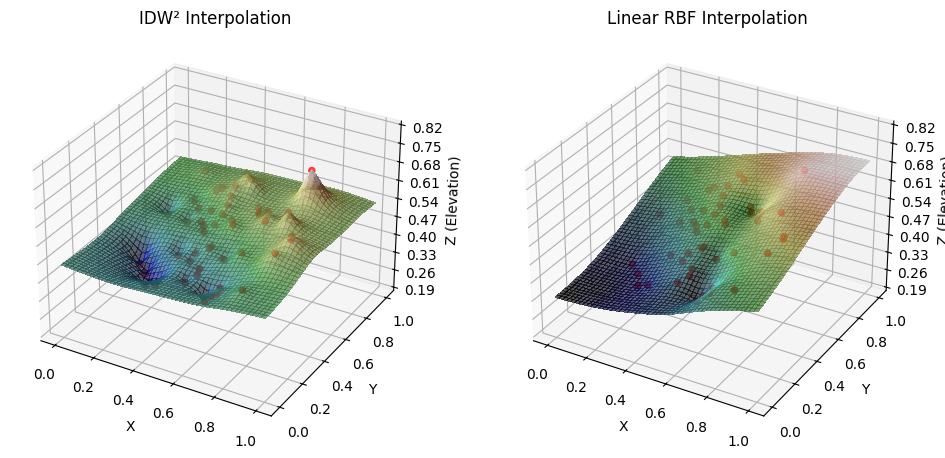

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator, Rbf
from matplotlib.colors import LightSource
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# --- Terrain Generation ---

# 1. Generate Scattered Data
np.random.seed(42)  # For reproducibility

# Range for Scattered Points (80% of surface extent)
x_range = (0.1, 0.9)  
y_range = (0.1, 0.9) 

# Hill Plane (Gently Sloping, biased towards the back)
x_hill = np.random.rand(100) * (x_range[1] - x_range[0]) + x_range[0]
y_hill = np.random.rand(100) * (y_range[1] - y_range[0]) + y_range[0]
z_hill = 0.5 * x_hill + 0.3 * y_hill + 0.2 * (1 - x_hill)  

# Creeks (Carved Depressions - with bias for perpendicularity)
num_creeks = 2
x_creek, y_creek, z_creek = [], [], []
for _ in range(num_creeks):
    creek_length = 20

    # Choose starting points within the restricted range
    x_start = np.random.rand() * (x_range[1] - x_range[0]) + x_range[0]
    y_start = np.random.rand() * (y_range[1] - y_range[0]) + y_range[0]
    
    # Biased Direction for Creeks (ensure they stay within the range)
    creek_direction = np.random.choice([-1, 1])
    if creek_direction == -1:
        x_c = np.linspace(x_start, np.minimum(x_start + 0.2, x_range[1]), creek_length)
        y_c = np.linspace(y_start, y_start + np.random.rand() * 0.1 * (y_range[1] - y_start), creek_length)
    else:
        x_c = np.linspace(x_start, x_start + np.random.rand() * 0.1 * (x_range[1] - x_start), creek_length)
        y_c = np.linspace(y_start, np.minimum(y_start + 0.2, y_range[1]), creek_length)

    z_c = 0.5 * x_c + 0.3 * y_c + 0.2 * (1 - x_c) - 0.1 * np.sin(4 * x_c)  # Adjust creek depths to match the biased hill plane
    x_creek.extend(x_c)
    y_creek.extend(y_c)
    z_creek.extend(z_c)

x = np.concatenate([x_hill, x_creek])
y = np.concatenate([y_hill, y_creek])
z = np.concatenate([z_hill, z_creek])

# Exaggerate Z values by 10%
z_exaggerated = z * 1.0  

# Define Interpolation Grid
xi, yi = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))

# --- Scattered Data for Interpolation ---

# Generate Scattered Data Points
np.random.seed(123)  # Seed for Scattered Data Generation
num_points = 50  
x_scatter = np.random.rand(num_points) * (x_range[1] - x_range[0]) + x_range[0]
y_scatter = np.random.rand(num_points) * (y_range[1] - y_range[0]) + y_range[0]

# --- Interpolate z values for Scattered Data using a temporary RBF ---
# Interpolator used for consistent analysis.
interp_rbf = Rbf(x, y, z, function='multiquadric', smooth=0)  
z_scatter = interp_rbf(x_scatter, y_scatter)

# Interpolator used in paper figures.
interp_rbf_scatter = RBFInterpolator(np.column_stack((x, y)), z, kernel='linear', smoothing=0)
z_scatter = interp_rbf_scatter(np.column_stack((x_scatter, y_scatter)))

# --- Interpolation Methods ---

# IDW² Interpolation
def simple_idw_squared_3d(x, y, z, xi, yi):
    dist = np.sqrt((x - xi.ravel()[:, np.newaxis])**2 + (y - yi.ravel()[:, np.newaxis])**2)
    weights = 1.0 / (dist ** 2)  
    weights /= weights.sum(axis=1, keepdims=True)  
    zi = np.dot(weights, z)
    return zi.reshape(xi.shape)

zi_idw = simple_idw_squared_3d(x_scatter, y_scatter, z_scatter, xi, yi)

# Linear RBF Interpolation
interp_rbf = RBFInterpolator(np.column_stack((x_scatter, y_scatter)), z_scatter, kernel='linear', smoothing=0)
zi_rbf = interp_rbf(np.column_stack((xi.ravel(), yi.ravel()))).reshape(xi.shape)

# --- Visualization ---
fig = plt.figure(figsize=(10, 5))
alpha_value = 0.65

# Plot Comparison (IDW² vs. RBF)
for i, (zi, title) in enumerate([(zi_idw, 'IDW² Interpolation'), (zi_rbf, 'Linear RBF Interpolation')]):
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    
    ls = LightSource(270, 45)
    rgb = ls.shade(zi, plt.cm.gist_earth)
    
    ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, alpha=alpha_value)
    ax.scatter(x_scatter, y_scatter, z_scatter, c='red', marker='o')  
    ax.set_zlim(z_exaggerated.min() - 0.1, z_exaggerated.max() + 0.1)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Elevation)')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top margin for the title

plt.show()

* * * * *
**For most interpolation tasks, `RBFInterpolator` is recommended due to its performance benefits and ease of use.**
--
* * * * *
**Comparing `Rbf` and `RBFInterpolator` for Interpolation**

This code demonstrates two ways to interpolate scattered data in Python using Radial Basis Functions (RBFs):

-   **`scipy.interpolate.Rbf`**: A classic and flexible approach for RBF interpolation.
-   **`scipy.interpolate.RBFInterpolator`**: A newer, more optimized implementation introduced in SciPy 1.7.

**Key Differences**

-   **Functionality:**

    -   `Rbf` is more general-purpose and allows for a wider range of kernel functions (including custom ones).
    -   `RBFInterpolator` is optimized for certain common kernels and offers built-in support for multidimensional interpolation.
-   **Performance:**

    -   `RBFInterpolator` is generally faster and more memory-efficient than `Rbf`, especially for large datasets or higher dimensions.
-   **Ease of Use:**

    -   `RBFInterpolator` often requires less setup and boilerplate code compared to `Rbf`.

**Code Explanation**

1.  **Generate Sample Data:**

    -   We create a noisy sine wave by sampling points from the sine function and adding a small amount of random noise.
2.  **Define Interpolation Grid:**

    -   A denser grid of points is created to evaluate the interpolated functions.
3.  **`Rbf` Interpolation:**

    -   An `Rbf` object is created using the sample data and a 'linear' kernel.
    -   The `interp_rbf` function is then used to interpolate values on the grid.
4.  **`RBFInterpolator` Interpolation:**

    -   An `RBFInterpolator` object is created using the sample data and a 'thin_plate_spline' kernel.
    -   The `rbf` function is used to interpolate values on the grid.
5.  **Plotting:**

    -   The original noisy data, the two interpolated curves, and the true sine wave are plotted for comparison.

**Observations**

-   Both `Rbf` and `RBFInterpolator` successfully reconstruct the underlying sine wave from the noisy data.
-   The choice of kernel function can influence the smoothness and behavior of the interpolated curve.
-   In this example, `RBFInterpolator` with the 'thin_plate_spline' kernel produces a slightly smoother interpolation compared to `Rbf` with the 'linear' kernel.
-   `Rbf` remains useful for cases where you need more flexibility in choosing kernel functions or working with custom kernels.

**The Emergence of `Rbf`**

-   Early Adoption of RBFs: Radial Basis Functions gained popularity in the scientific computing community for their flexibility and ability to handle scattered data interpolation in multiple dimensions.
-   Inclusion in SciPy:  `scipy.interpolate.Rbf` was likely one of the early interpolation methods incorporated into SciPy, providing users with a tool to leverage the power of RBFs.
-   Flexibility:  `Rbf`'s design emphasized flexibility, allowing users to define custom kernel functions and fine-tune various parameters. This made it adaptable to a wide range of interpolation scenarios.

**The Need for `RBFInterpolator`**

-   Performance Bottlenecks: As datasets grew larger and more complex, the computational and memory demands of `Rbf` became apparent, particularly in higher dimensions.
-   Optimization and Specialization: To address these performance limitations,  `RBFInterpolator` was introduced in SciPy 1.7.
-   Efficiency:  `RBFInterpolator` was designed with efficiency in mind, leveraging optimized algorithms and data structures for common RBF kernels.
-   Multidimensional Support: It also natively supports multidimensional interpolation, making it more convenient for handling complex datasets.

**Coexistence of Both:**

-   Backward Compatibility:  `Rbf` is still maintained in SciPy for backward compatibility and to support use cases that require custom kernels or specific functionalities not yet available in `RBFInterpolator`.
-   Transition Period: The introduction of `RBFInterpolator` represents a transition towards a more performant and specialised RBF interpolation tool. However, it might take time for users to fully migrate from the older `Rbf` class, especially for legacy code or niche applications.

**In summary:**

-   `Rbf` was an early and flexible implementation of RBF interpolation in SciPy.
-   `RBFInterpolator` was introduced later to address performance limitations and provide optimized support for common kernels and multidimensional interpolation.
-   Both classes coexist in SciPy, offering users a choice based on their specific needs and priorities.


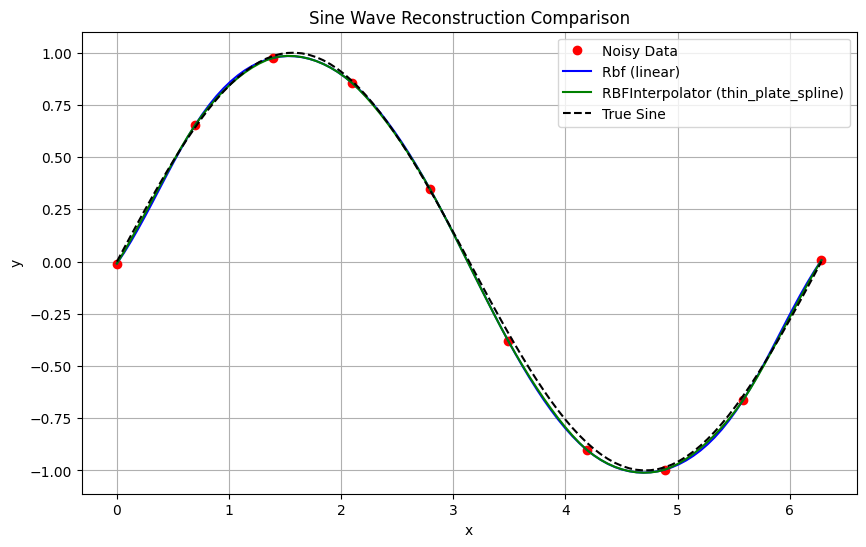

In [2]:
from scipy.interpolate import Rbf, RBFInterpolator
import matplotlib.pyplot as plt
import numpy as np

# Noisy sine wave data
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x) + 0.02 * np.random.randn(10) 

# Grid for interpolation
x_grid = np.linspace(0, 2 * np.pi, 100)

# Rbf interpolation
interp_rbf = Rbf(x, y, kernel='linear')
y_rbf = interp_rbf(x_grid)

# RBFInterpolator
rbf = RBFInterpolator(x[:, np.newaxis], y, kernel='thin_plate_spline') 
y_interp = rbf(x_grid[:, np.newaxis])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Noisy Data')
plt.plot(x_grid, y_rbf, 'b-', label='Rbf (linear)')
plt.plot(x_grid, y_interp, 'g-', label='RBFInterpolator (thin_plate_spline)')
plt.plot(x_grid, np.sin(x_grid), 'k--', label='True Sine')
plt.legend()
plt.title('Sine Wave Reconstruction Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()